In [14]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from scipy.integrate import quad
import timeit

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [16]:
!mkdir $figpath
genplots=True

usage: mkdir [-pv] [-m mode] directory ...


In [17]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans',
          'image.cmap':'jet'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

In [7]:
nside=64 ; upnside=nside ; npix=h.nside2npix(upnside)
lmax=3*nside ; lmin=2
ell=arange(lmax+1)

odisc=min(180.,180.*(32./lmax))
print odisc

NameError: name 'arange' is not defined

In [4]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

/Users/adityarotti/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
cltemp=h.read_cl("../data/planck_wp_highL_lensing_param.fits")
#cl=[cltemp[0],cltemp[1],cltemp[2],cltemp[3]*0] # Reverse E and B spectra
#figpath="../article/figures/"

cl=[cltemp[0],cltemp[2],cltemp[1],cltemp[3]*0] # Reverse E and B spectra
figpath="../article/figures/complementary/"

random.seed(0) ; tqu=h.synfast(cl,nside,pol=True,new=True,verbose=False)

# Get teb maps from Healpix.
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; teb=h.alm2map(alm,upnside,pol=False,verbose=False)

# Get data power spectrum.
cld=h.alm2cl(alm)

# Get Q/U corresponding to E and B modes.
alm[2][:]=0.0 ; equ=h.alm2map(alm,nside=nside,pol=True,verbose=False)
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; alm[1][:]=0.0 ; bqu=h.alm2map(alm,nside=nside,pol=True,verbose=False)

fl=ones(3*nside+1,float) ; fl[:lmin+1]=0

In [6]:
y=rk.real_space_queb_kernels(nside,tmax=2.2*odisc,maxlmax=3*nside,sampling=2500)
y.calc_qu2eb_rad_kernel(lmax,lmin)
y.calc_qu2queb_rad_kernel(lmax,lmin)

In [9]:
y.setup_taper(2.2*odisc,2.) ; y.setup_fn_rad_ker()

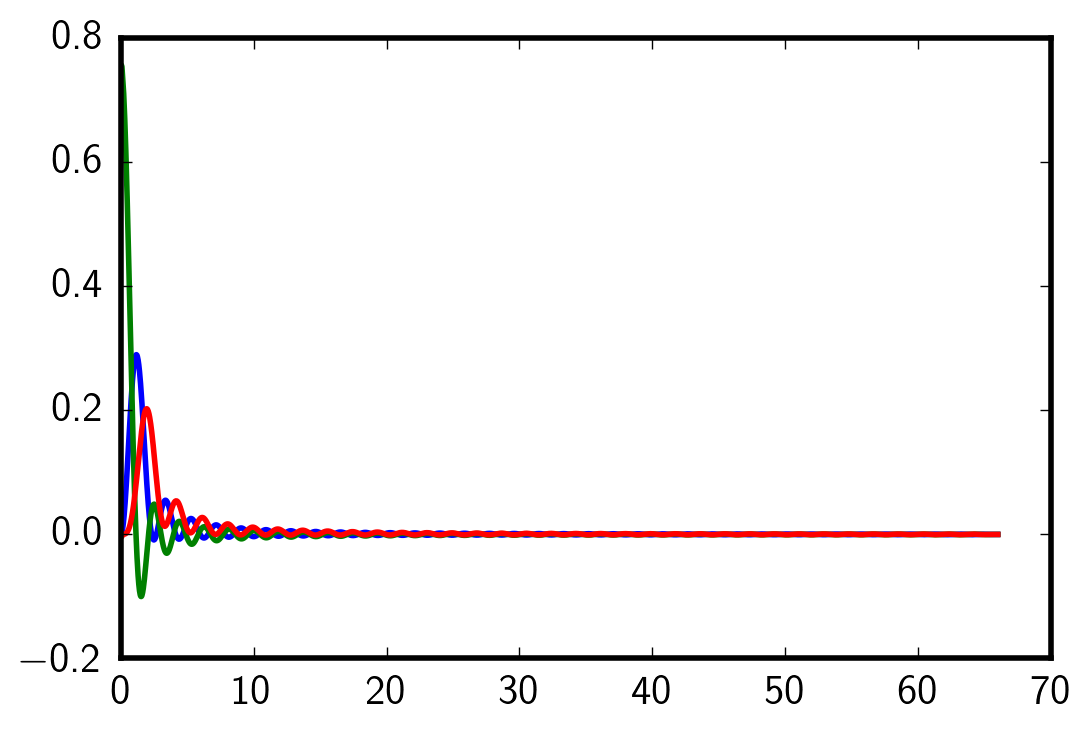

In [10]:
plot(y.theta*180/pi,y.fn_rad_ker(y.theta))
plot(y.theta*180/pi,y.fn_rad_ker_m2(y.theta))
plot(y.theta*180/pi,y.fn_rad_ker_p2(y.theta))

In [11]:
disc=2.*odisc ; y.setup_taper(disc,3.) ; y.setup_fn_rad_ker()
rteb0=y.convert_qu2eb(tqu,discsize=disc)

In [12]:
disc=1.0*odisc ; y.setup_taper(disc,3.) ; y.setup_fn_rad_ker()
rteb1=y.convert_qu2eb(tqu,discsize=disc)

In [13]:
disc=0.5*odisc ; y.setup_taper(disc,3.) ; y.setup_fn_rad_ker()
rteb2=y.convert_qu2eb(tqu,discsize=disc)

In [14]:
disc=0.25*odisc ; y.setup_taper(disc,3.) ; y.setup_fn_rad_ker()
rteb3=y.convert_qu2eb(tqu,discsize=disc)

In [15]:
clrteb0=h.alm2cl(h.map2alm(rteb0,pol=False,lmax=3*nside))
clrteb1=h.alm2cl(h.map2alm(rteb1,pol=False,lmax=3*nside))
clrteb2=h.alm2cl(h.map2alm(rteb2,pol=False,lmax=3*nside))
clrteb3=h.alm2cl(h.map2alm(rteb3,pol=False,lmax=3*nside))

In [16]:
fll=ell*(ell+1)/(2.*pi)

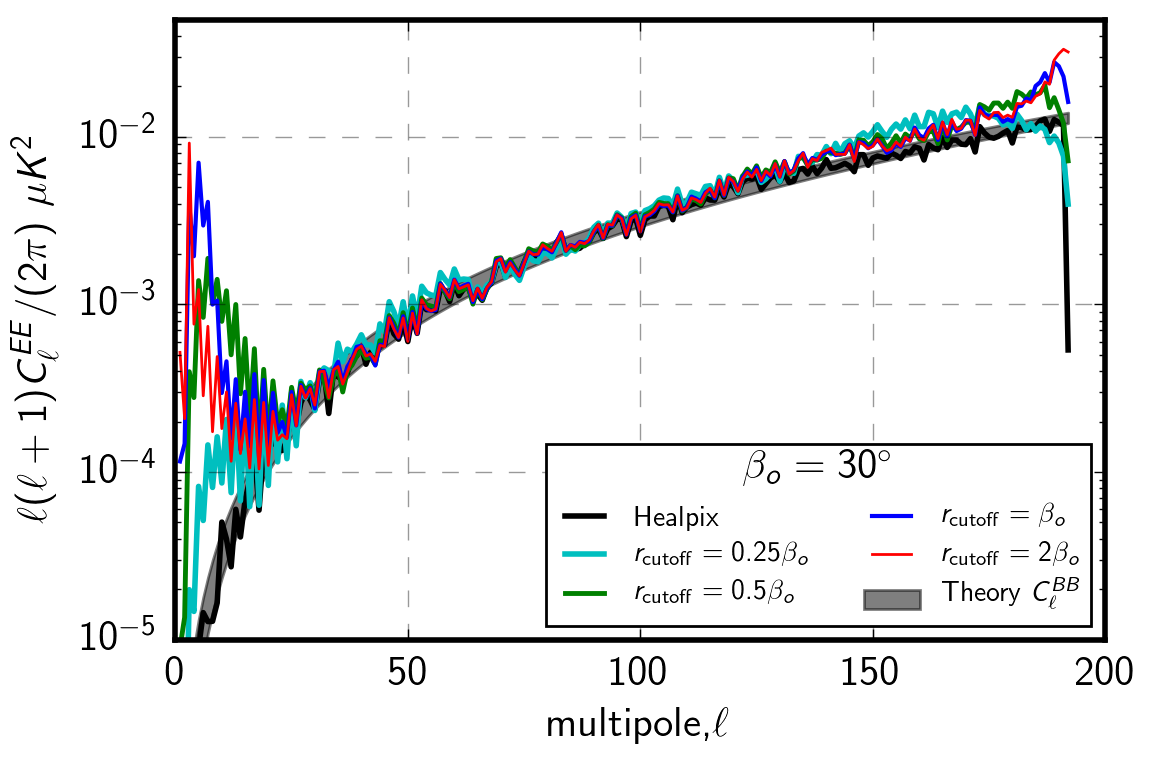

In [46]:
#plot(ell,fll*cl[1][:lmax+1],"k-",lw=5,label=r"Theory",alpha=0.4)
std=sqrt(2./(2.*ell+1))*cl[1][:lmax+1]
fill_between(ell,fll*(cl[1][:lmax+1]-std),fll*(cl[1][:lmax+1]+std),color="k",alpha=0.5,label=r"Theory $C^{BB}_{\ell}$")
plot(ell,fll*cld[1],"k-",label="Healpix")
plot(ell,fll*clrteb3[1],"c-",lw=2,label=r"$r_{\rm cutoff} = 0.25\beta_{o}$")
plot(ell,fll*clrteb2[1],"g-",lw=1.75,label=r"$r_{\rm cutoff} = 0.5\beta_{o}$")
plot(ell,fll*clrteb1[1],"b-",lw=1.5,label=r"$r_{\rm cutoff} = \beta_{o}$")
plot(ell,fll*clrteb0[1],"r-",lw=1,label=r"$r_{\rm cutoff} = 2\beta_{o}$")
semilogy()
ylim(1e-5,5e-2)
xlabel("multipole,$\ell$")
ylabel("$\ell(\ell+1)C^{EE}_{\ell}/(2\pi) ~ \mu K^2$")
legend(loc=0,fontsize=10,ncol=2,title=r"$\beta_o=30^{\circ}$")
grid(alpha=0.4,linestyle="dashed")
if genplots:
    savefig(figpath + "ee-spectrum-radial-cutoff.pdf",dpi=300,bbox_inches="tight")

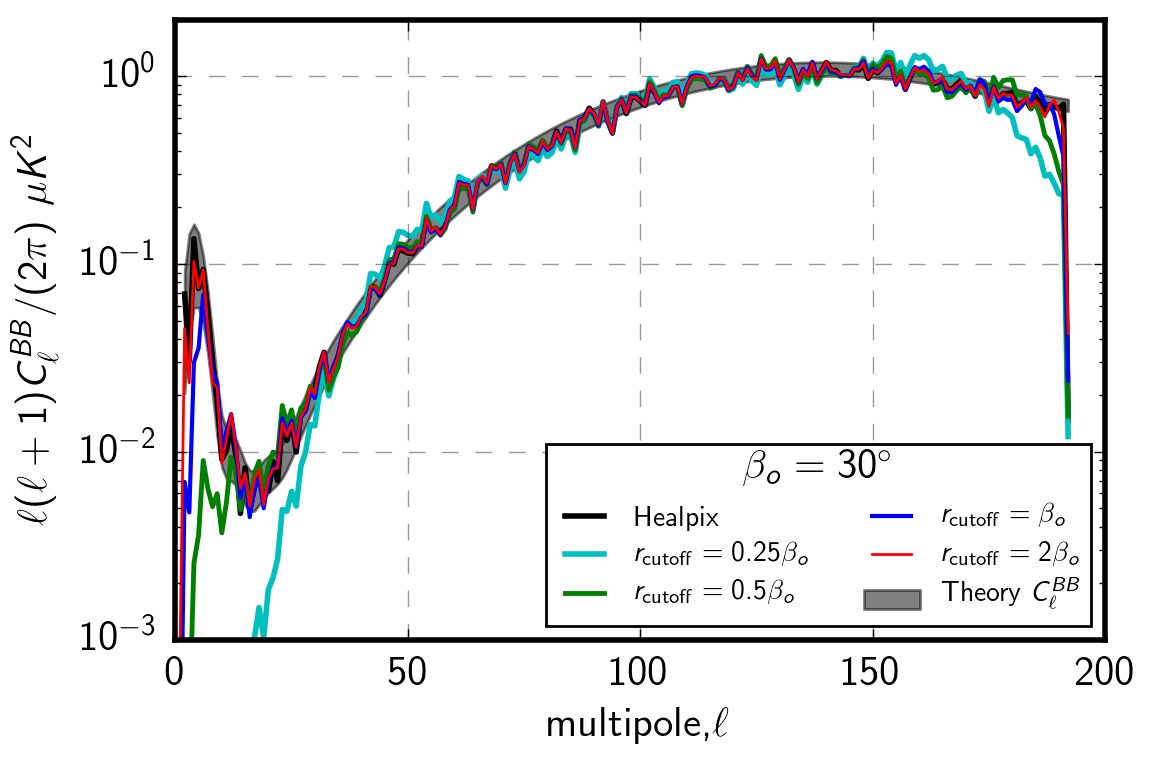

In [45]:
#plot(ell,fll*cl[2][:lmax+1],"k-",lw=6,label=r"Theory",alpha=0.2)
std=sqrt(2./(2.*ell+1))*cl[2][:lmax+1]
fill_between(ell,fll*(cl[2][:lmax+1]-std),fll*(cl[2][:lmax+1]+std),color="k",alpha=0.5,label=r"Theory $C^{BB}_{\ell}$")
plot(ell,fll*cld[2],"k-",label="Healpix")
plot(ell,fll*clrteb3[2],"c-",lw=2,label=r"$r_{\rm cutoff} = 0.25\beta_{o}$")
plot(ell,fll*clrteb2[2],"g-",lw=1.75,label=r"$r_{\rm cutoff} = 0.5\beta_{o}$")
plot(ell,fll*clrteb1[2],"b-",lw=1.5,label=r"$r_{\rm cutoff} = \beta_{o}$")
plot(ell,fll*clrteb0[2],"r-",lw=1,label=r"$r_{\rm cutoff} = 2\beta_{o}$")
semilogy()
ylim(1e-3,2)
xlabel("multipole,$\ell$")
ylabel("$\ell(\ell+1)C^{BB}_{\ell}/(2\pi) ~ \mu K^2$")
legend(loc=0,fontsize=10,ncol=2,title=r"$\beta_o=30^{\circ}$")
grid(alpha=0.4,linestyle="dashed")
if genplots:
    savefig(figpath + "bb-spectrum-radial-cutoff.pdf",dpi=300,bbox_inches="tight")

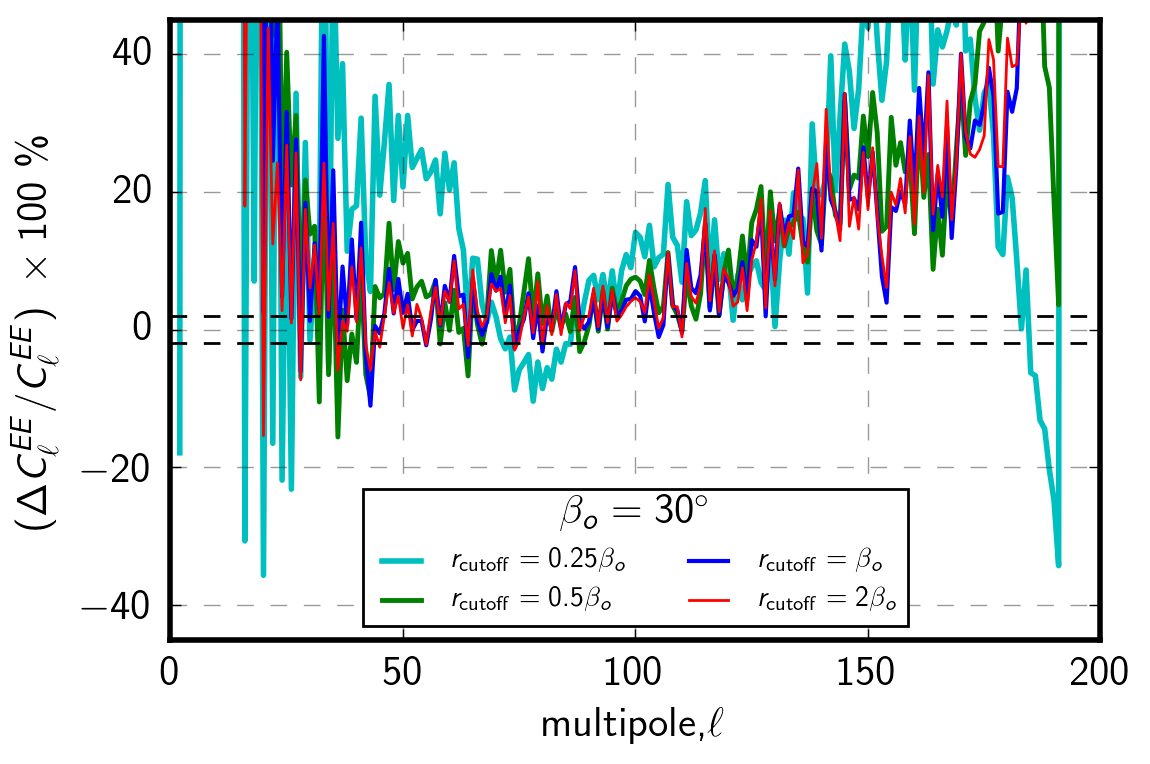

In [39]:
std=cld[1]/100.
plot(ell,(clrteb3[1]-cld[1])/std,"c-",lw=2,label=r"$r_{\rm cutoff} = 0.25\beta_{o}$")
plot(ell,(clrteb2[1]-cld[1])/std,"g-",lw=1.75,label=r"$r_{\rm cutoff} = 0.5\beta_{o}$")
plot(ell,(clrteb1[1]-cld[1])/std,"b-",lw=1.5,label=r"$r_{\rm cutoff} = \beta_{o}$")
plot(ell,(clrteb0[1]-cld[1])/std,"r-",lw=1,label=r"$r_{\rm cutoff} = 2\beta_{o}$")
ylim(-45,45)
xlabel("multipole,$\ell$")
ylabel(r"$(\Delta C^{EE}_{\ell}/C^{EE}_{\ell}) ~\times 100 ~\%$")
legend(loc=0,fontsize=10,ncol=2,title=r"$\beta_o=30^{\circ}$")
axhline(-2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
axhline(2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
grid(alpha=0.4,linestyle="dashed")
if genplots:
    savefig(figpath + "relative-percentage-err-ee-spectrum-radial-cutoff.pdf",dpi=300,bbox_inches="tight")

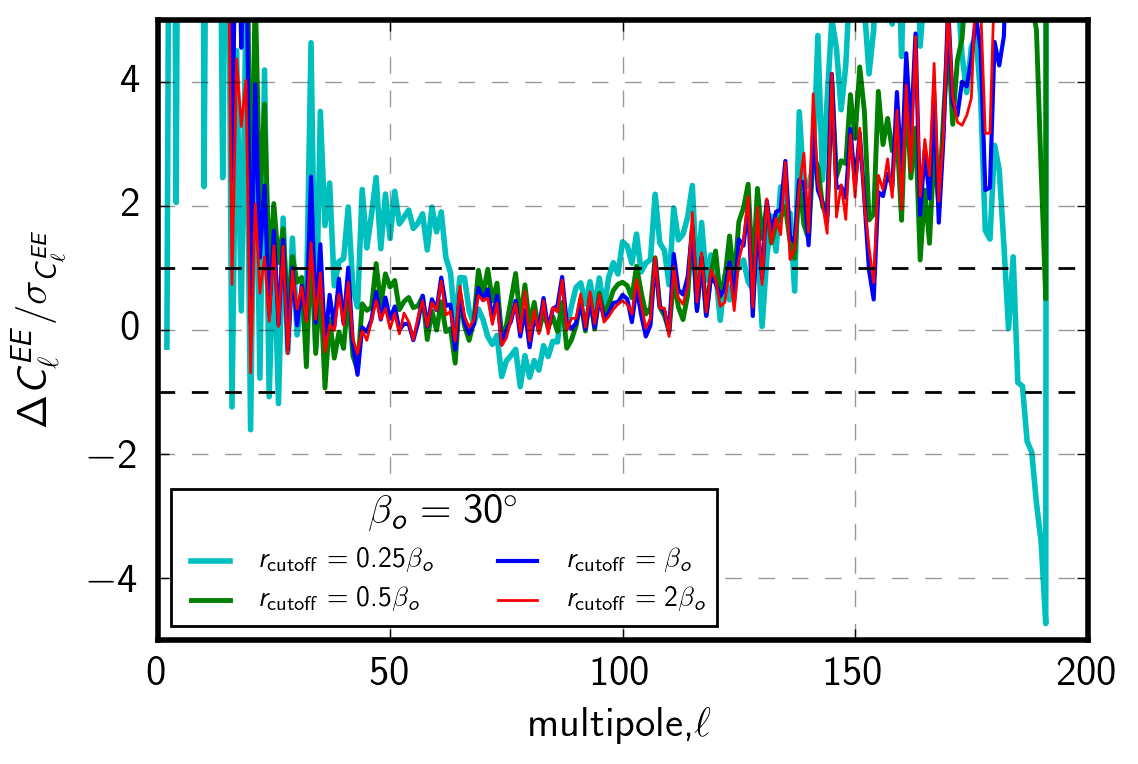

In [40]:
std=sqrt(2./(2.*ell+1))*cld[1]
plot(ell,(clrteb3[1]-cld[1])/std,"c-",lw=2,label=r"$r_{\rm cutoff} = 0.25\beta_{o}$")
plot(ell,(clrteb2[1]-cld[1])/std,"g-",lw=1.75,label=r"$r_{\rm cutoff} = 0.5\beta_{o}$")
plot(ell,(clrteb1[1]-cld[1])/std,"b-",lw=1.5,label=r"$r_{\rm cutoff} = \beta_{o}$")
plot(ell,(clrteb0[1]-cld[1])/std,"r-",lw=1,label=r"$r_{\rm cutoff} = 2\beta_{o}$")
ylim(-5,5)
axhline(-1.,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
axhline(1.,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
xlabel("multipole,$\ell$")
ylabel("$\Delta C^{EE}_{\ell}/\sigma_{C^{EE}_{\ell}}$")
legend(loc=0,fontsize=10,ncol=2,title=r"$\beta_o=30^{\circ}$")
grid(alpha=0.4,linestyle="dashed")
if genplots:
    savefig(figpath + "diff-ee-spectrum-radial-cutoff.pdf",dpi=300,bbox_inches="tight")

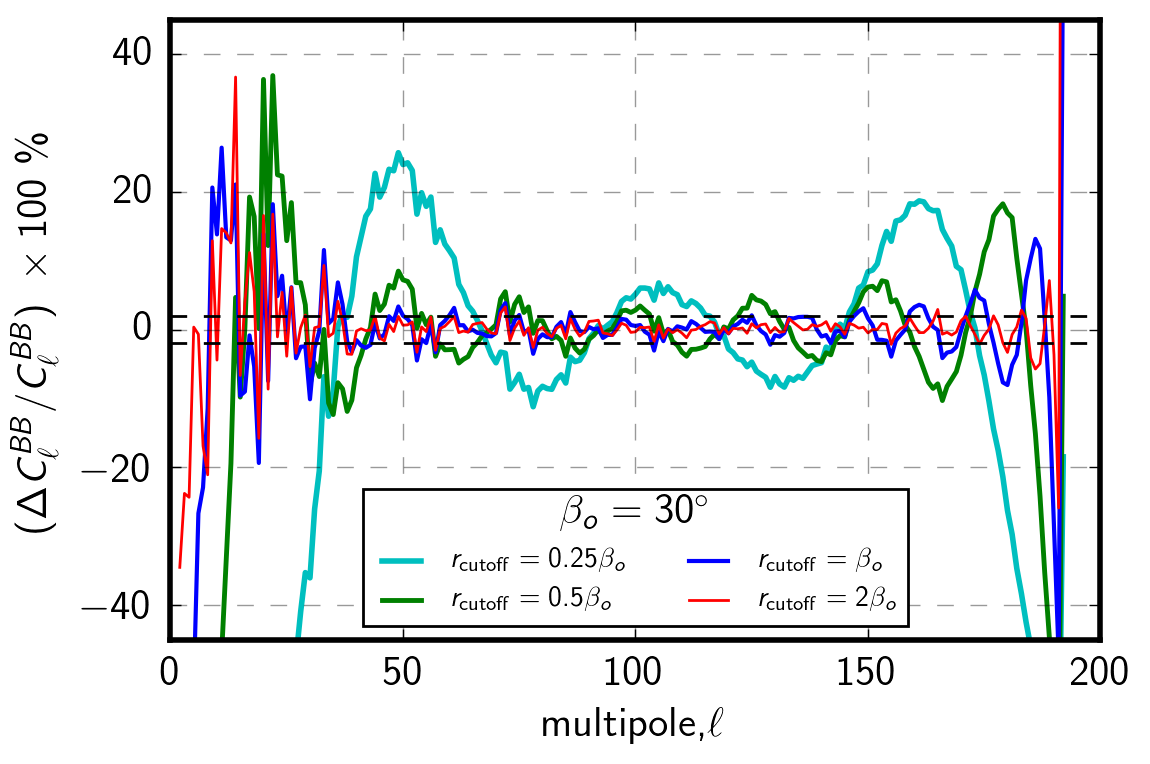

In [41]:
std=cld[2]/100.
plot(ell,(clrteb3[2]-cld[2])/std,"c-",lw=2,label=r"$r_{\rm cutoff} = 0.25\beta_{o}$")
plot(ell,(clrteb2[2]-cld[2])/std,"g-",lw=1.75,label=r"$r_{\rm cutoff} = 0.5\beta_{o}$")
plot(ell,(clrteb1[2]-cld[2])/std,"b-",lw=1.5,label=r"$r_{\rm cutoff} = \beta_{o}$")
plot(ell,(clrteb0[2]-cld[2])/std,"r-",lw=1,label=r"$r_{\rm cutoff} = 2\beta_{o}$")
ylim(-45,45)
xlabel("multipole,$\ell$")
ylabel(r"$(\Delta C^{BB}_{\ell}/C^{BB}_{\ell}) ~\times 100 ~\%$")
legend(loc=0,fontsize=10,ncol=2,title=r"$\beta_o=30^{\circ}$")
axhline(-2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
axhline(2,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
grid(alpha=0.4,linestyle="dashed")
if genplots:
    savefig(figpath + "relative-percentage-err-bb-spectrum-radial-cutoff.pdf",dpi=300,bbox_inches="tight")

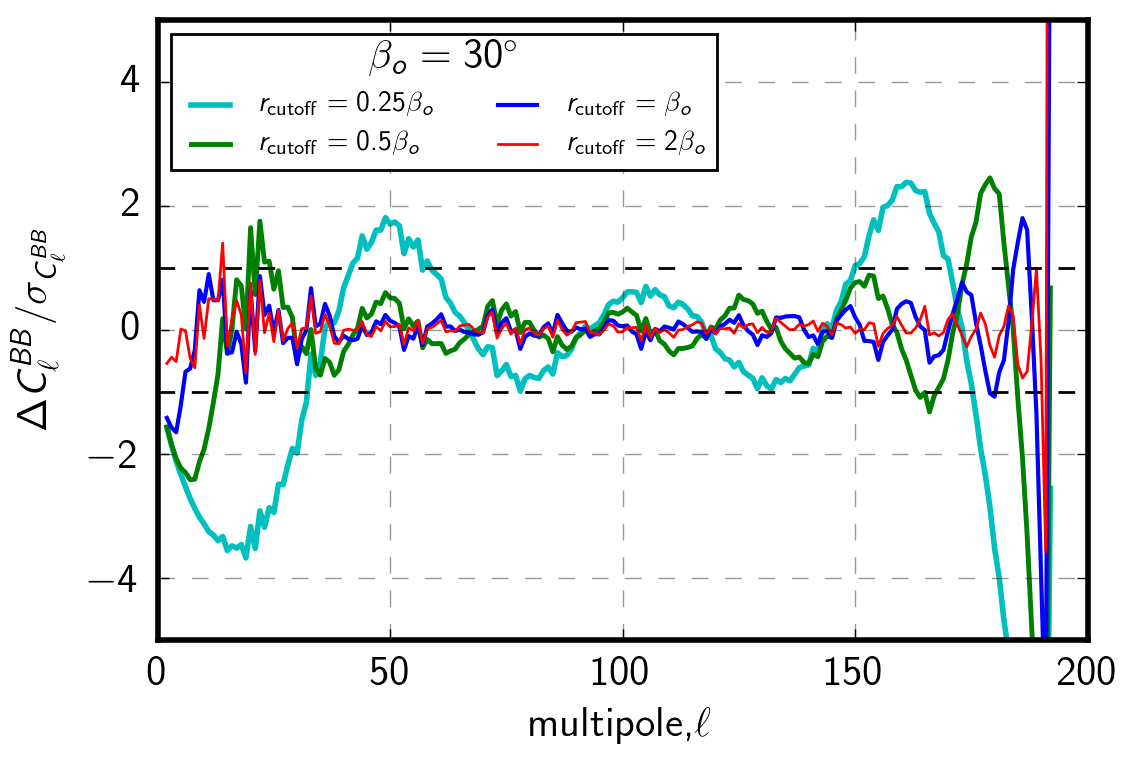

In [42]:
std=sqrt(2./(2.*ell+1))*cld[2]
plot(ell,(clrteb3[2]-cld[2])/std,"c-",lw=2,label=r"$r_{\rm cutoff} = 0.25\beta_{o}$")
plot(ell,(clrteb2[2]-cld[2])/std,"g-",lw=1.75,label=r"$r_{\rm cutoff} = 0.5\beta_{o}$")
plot(ell,(clrteb1[2]-cld[2])/std,"b-",lw=1.5,label=r"$r_{\rm cutoff} = \beta_{o}$")
plot(ell,(clrteb0[2]-cld[2])/std,"r-",lw=1,label=r"$r_{\rm cutoff} = 2\beta_{o}$")
ylim(-5,5)
axhline(-1,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
axhline(1,0,200,linestyle="dashed",alpha=1,color="k",lw=1)
grid(alpha=0.4,linestyle="dashed")
xlabel("multipole,$\ell$")
ylabel("$\Delta C^{BB}_{\ell}/\sigma_{C^{BB}_{\ell}}$")
legend(loc=0,fontsize=10,ncol=2,title=r"$\beta_o=30^{\circ}$")
if genplots:
    savefig(figpath + "diff-bb-spectrum-radial-cutoff.pdf",dpi=300,bbox_inches="tight")

In [23]:
h.write_map(figpath + "rteb_2beta.fits",rteb0)
h.write_map(figpath + "rteb_1beta.fits",rteb1)
h.write_map(figpath + "rteb_0p5beta.fits",rteb2)
h.write_map(figpath + "rteb_0p25beta.fits",rteb3)

        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.misc]
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


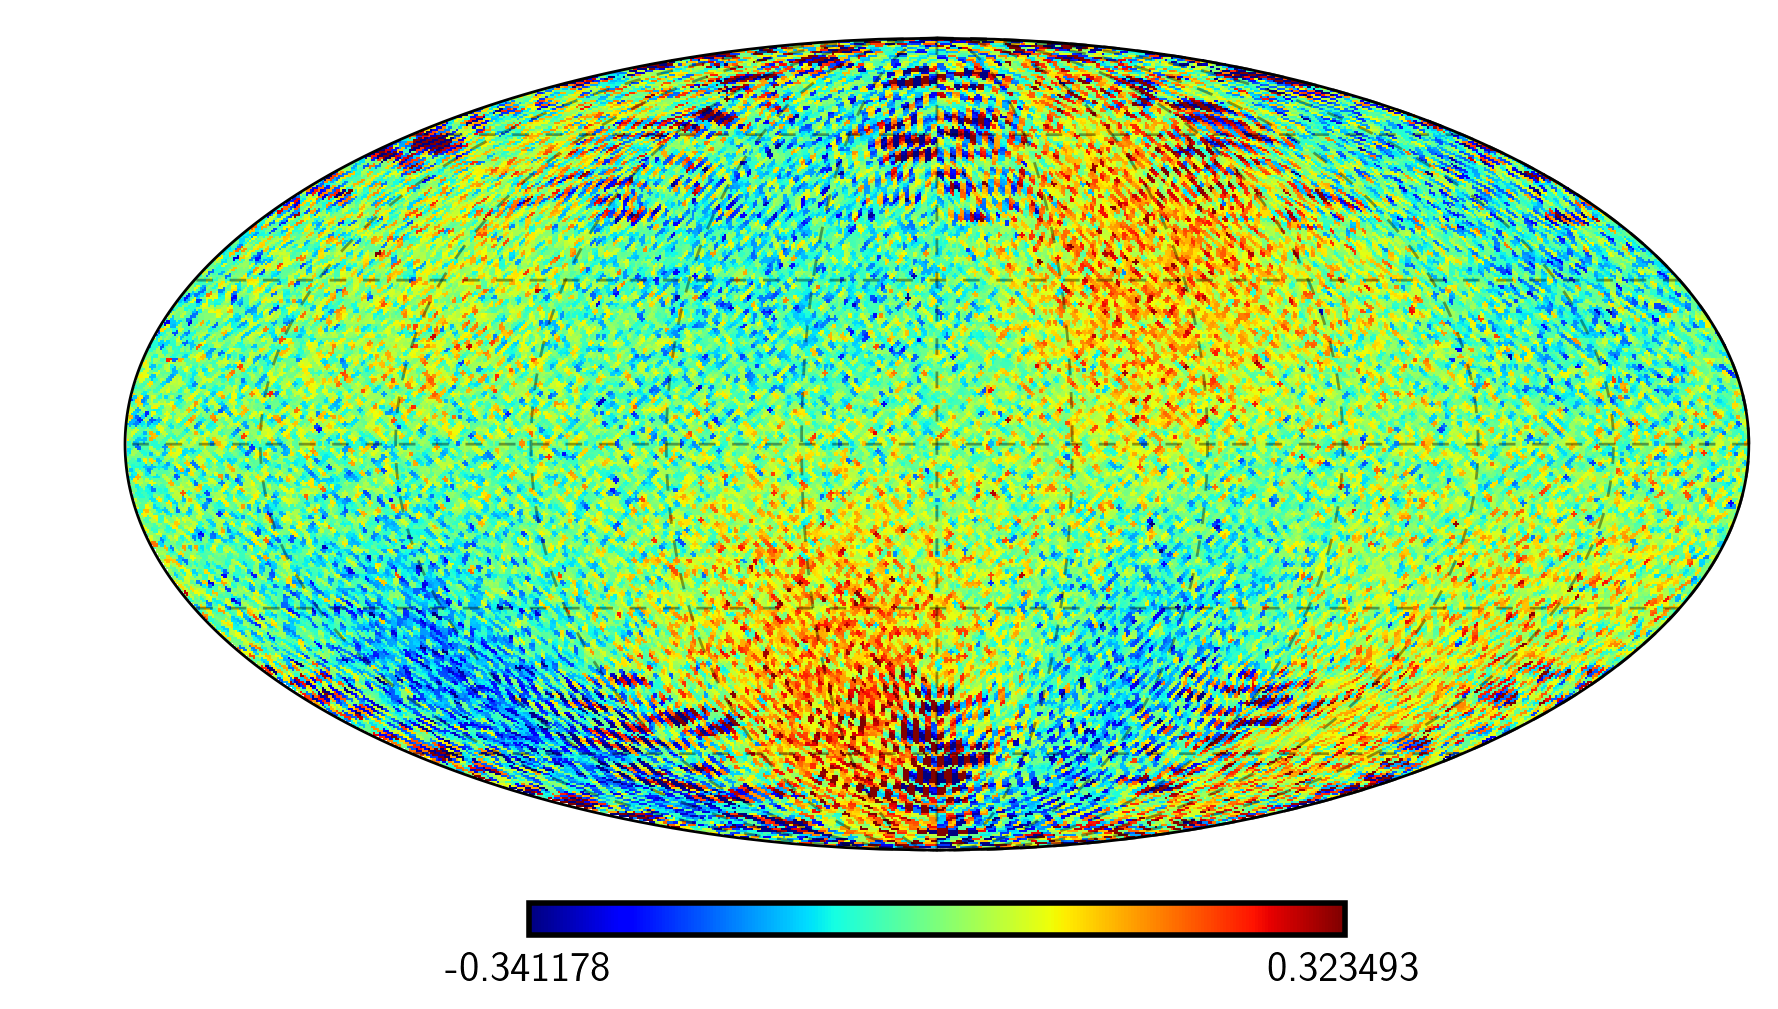

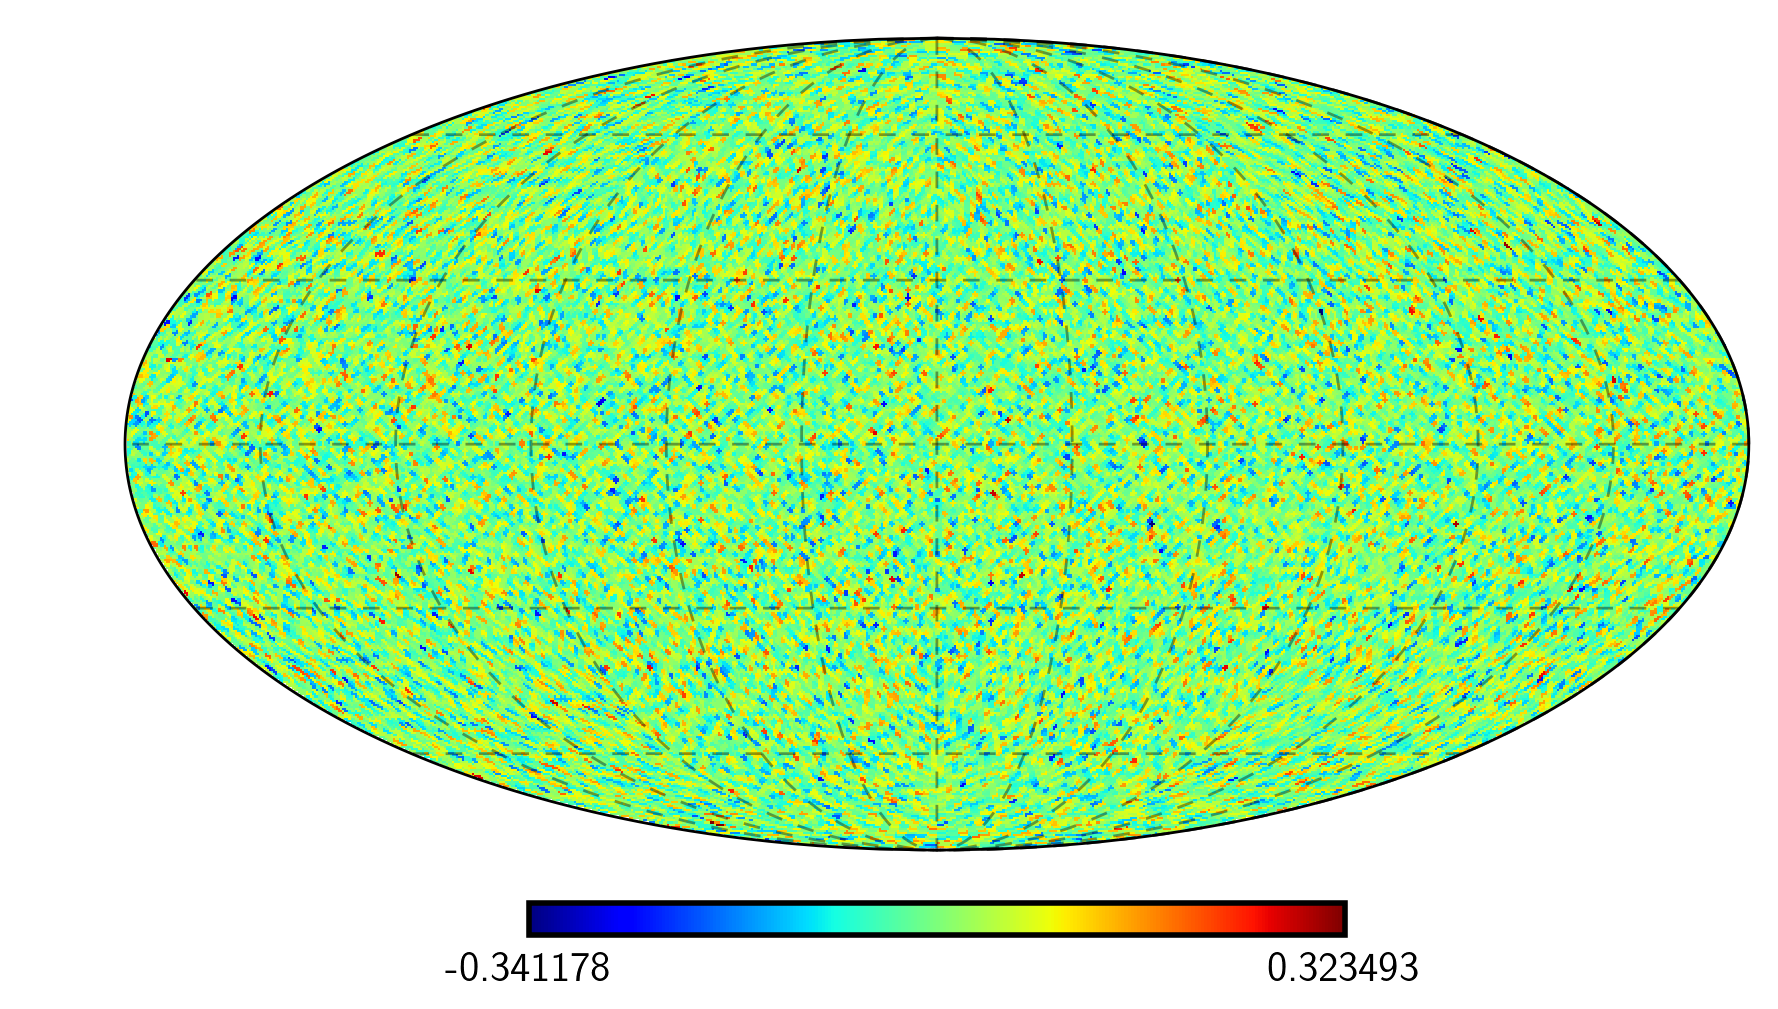

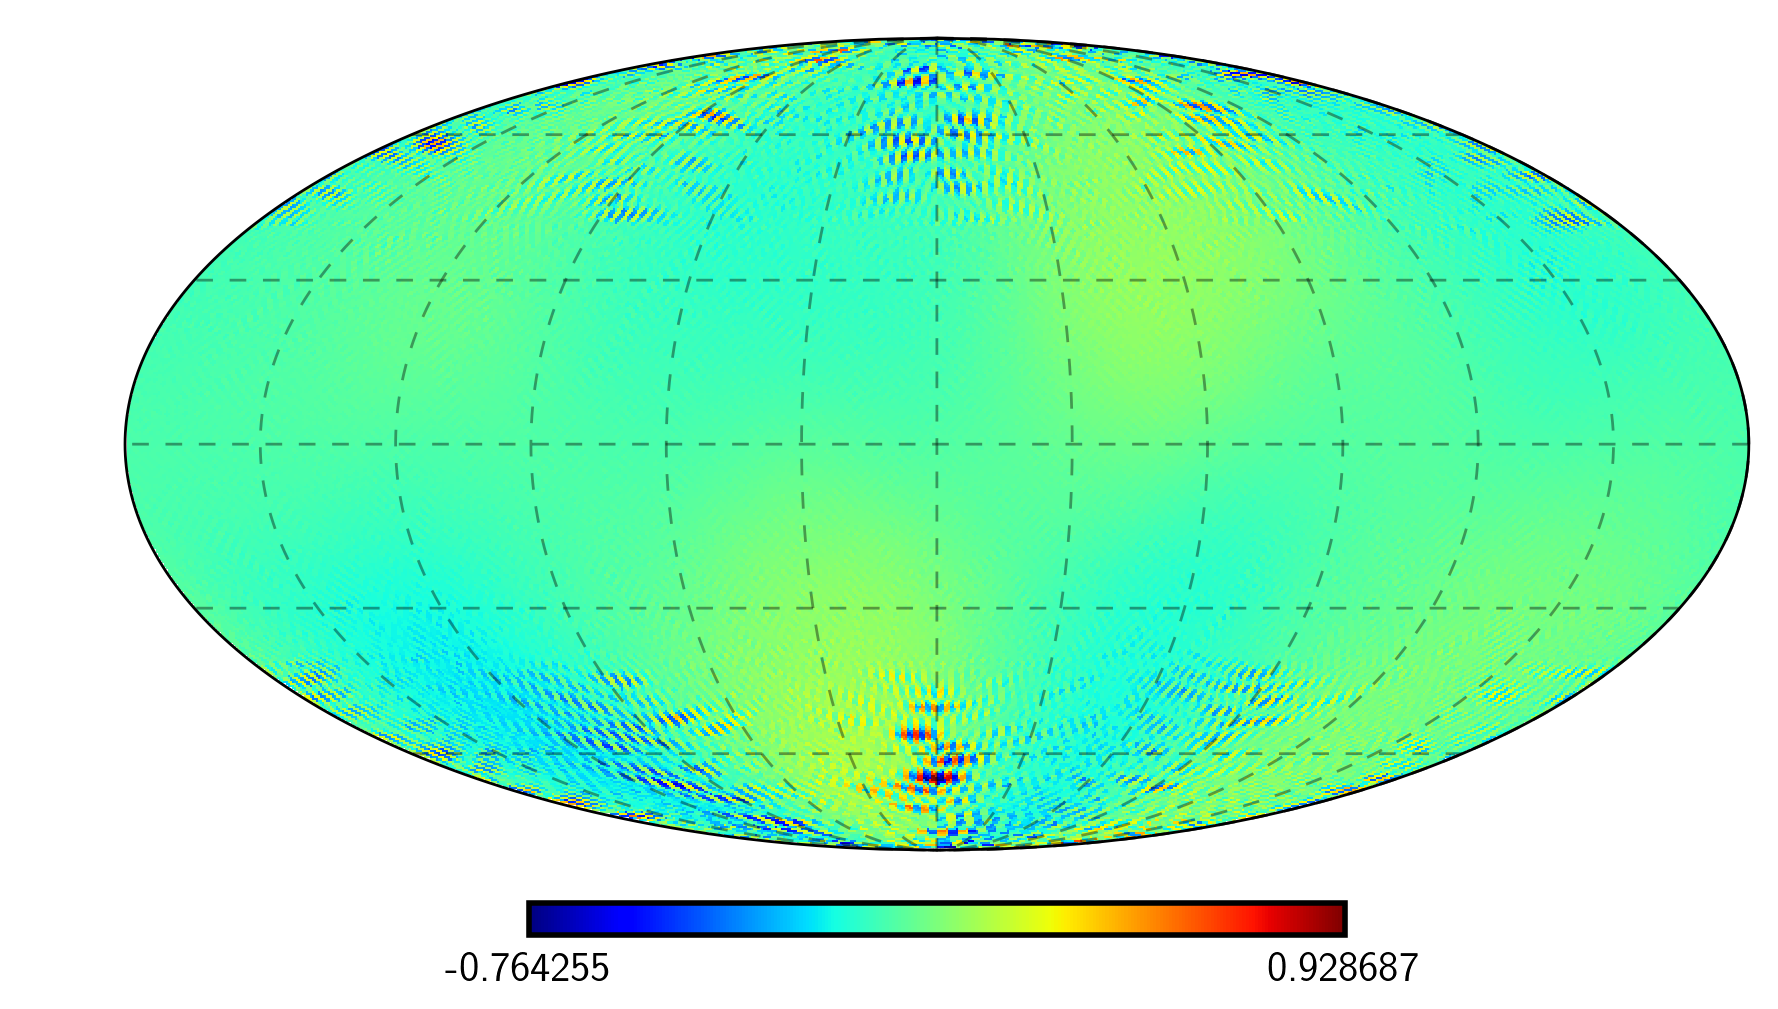

In [43]:
vmin=min(teb[1]) ; vmax=max(teb[1])

h.mollview(rteb0[1],min=vmin,max=vmax,title="") ; h.graticule(linestyle="dashed",alpha=0.4)
if genplots:
    savefig(figpath + "emap-2beta.pdf",dpi=300,bbox_inches="tight")
    
h.mollview(teb[1],min=vmin,max=vmax,title="") ; h.graticule(linestyle="dashed",alpha=0.4)
if genplots:
    savefig(figpath + "emap-healpix.pdf",dpi=300,bbox_inches="tight")
    
h.mollview(rteb0[1]-teb[1],title="") ; h.graticule(linestyle="dashed",alpha=0.4)
if genplots:
    savefig(figpath + "emap-diff.pdf",dpi=300,bbox_inches="tight")

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


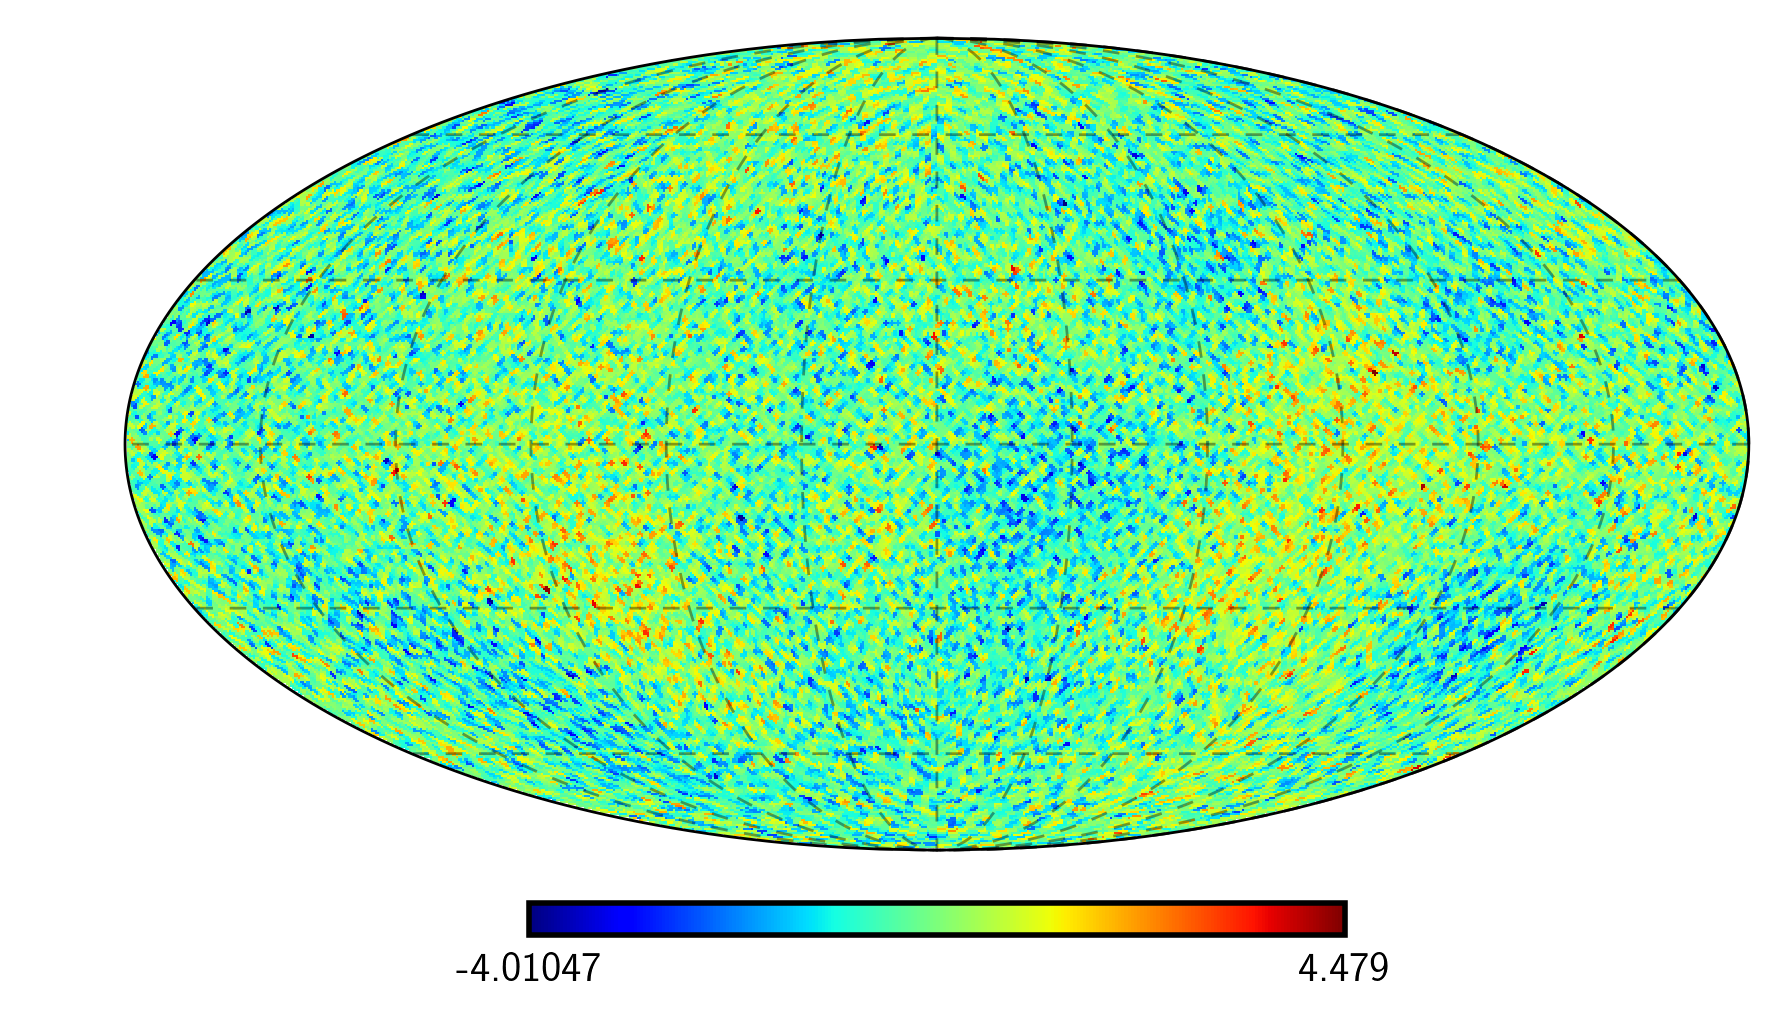

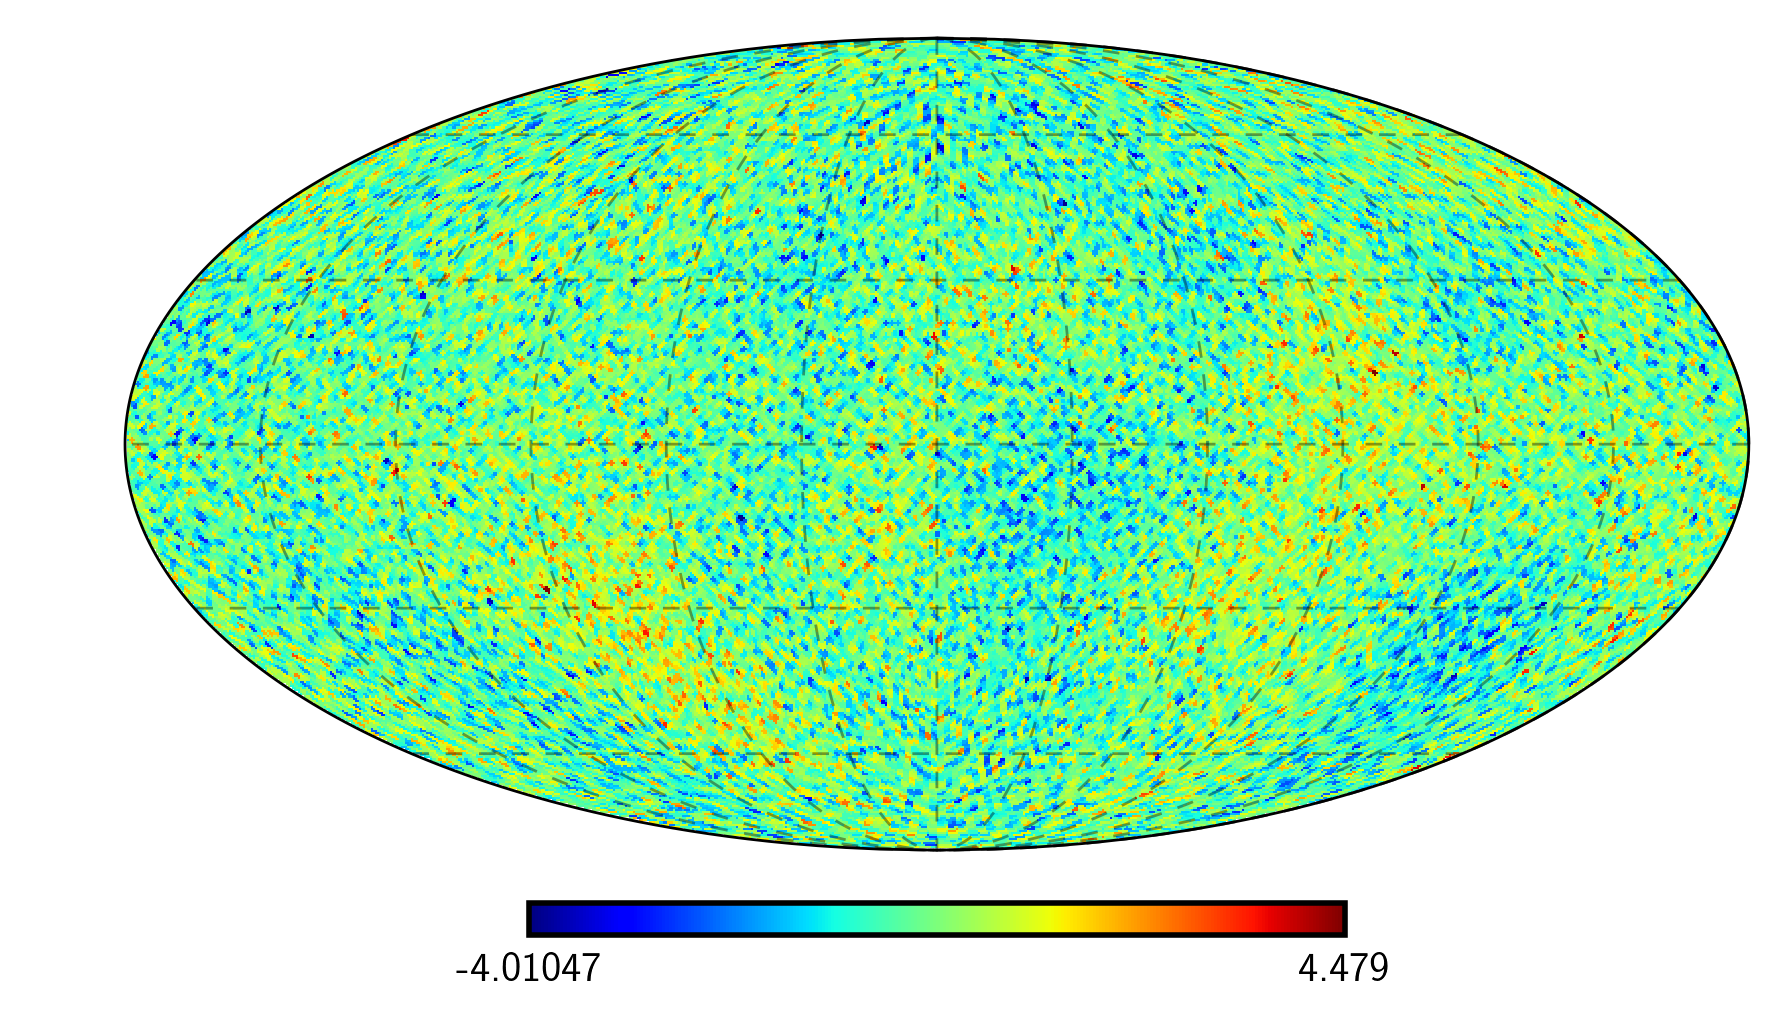

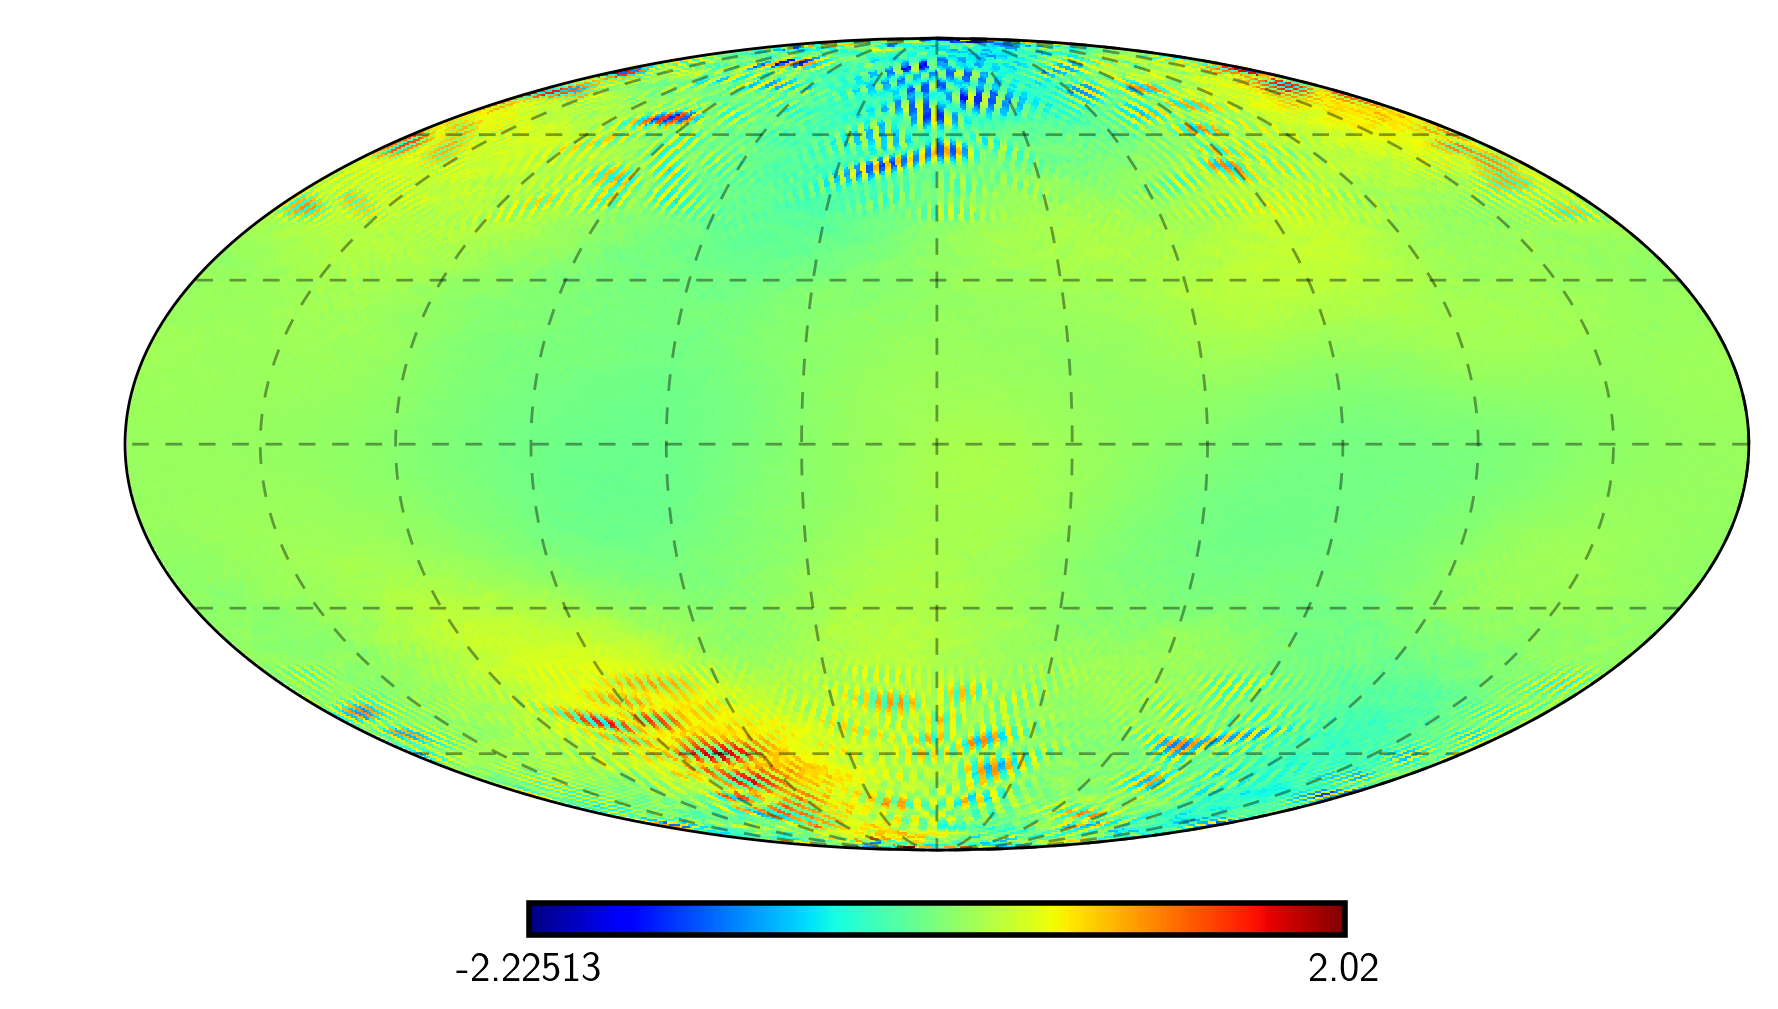

In [44]:
vmin=min(teb[2]) ; vmax=max(teb[2])
h.mollview(teb[2],min=vmin,max=vmax,title="") ; h.graticule(linestyle="dashed",alpha=0.4)
if genplots:
    savefig(figpath + "bmap-healpix.pdf",dpi=300,bbox_inches="tight")
    
h.mollview(rteb0[2],min=vmin,max=vmax,title="") ; h.graticule(linestyle="dashed",alpha=0.4)
if genplots:
    savefig(figpath + "bmap-2beta.pdf",dpi=300,bbox_inches="tight")
    

    
h.mollview(rteb0[2]-teb[2],title="") ; h.graticule(linestyle="dashed",alpha=0.4)
if genplots:
    savefig(figpath + "bmap-diff.pdf",dpi=300,bbox_inches="tight")

In [47]:
h.nside2npix(32)

12288

In [18]:
d=h.read_map("../../data/planck353full_TQU_map_nside512.fits",(0,1,2))

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [37]:
mmax=250
h.mollview(d[1],max=mmax,min=-mmax,title="353GHz Stokes Q")
savefig("353_Stokes_Q.pdf",dpi=150,bbox_inches="tight")
h.mollview(d[2],max=mmax,min=-mmax,title="353GHz Stokes U")
savefig("353_Stokes_U.pdf",dpi=150,bbox_inches="tight")